In [44]:
import numpy as np
import random
import pandas as pd

from keras.models import Model, load_model
from keras.layers import Dense, Activation, Input, Reshape 
from keras.layers import BatchNormalization
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
#Greatest Common Factor Function (assumes a and b don't equal 0) 
#This function will be used to generate the "ground truths", or the neural network's y values, for supervised learning 
def gcf(a, b):
    if b == 0:
        return a
    else:
        return gcf(b, a % b)

In [7]:
#check a few examples to make sure our gcf function isn't obviously wrong
print(gcf(18,9))
print(gcf(9,7))
print(gcf(19,19))
print(gcf(7,14))

9
1
19
7


In [64]:
#determine the upper limit of integers you want to train your neural network on 
highest_integer = 50

In [65]:
#generate some training data Xs    
#we will only be training the neural network on integer pairs up to 100
x = np.random.randint(1,highest_integer, size=(800000,2))

#initializating shape for the ground truths
#the shape will be the number of examples we're training on by the number of possible correct answers (when "one hot encoded")
y = np.zeros((x.shape[0],highest_integer))

#one hot encode the correct answers (ground truths)
for i in range(0, x.shape[0]):
    y[i][gcf(x[i][0],x[i][1])] = 1

#initialize the one hot encoding of the training data X inputs
#we are making our inputs categorical instead of integers
x_oh = np.zeros((x.shape[0],2,highest_integer))

#one hot encode the categories of the X values   
for i in range(0, x.shape[0]):
    x_oh[i][0][x[i,0]] = 1
    x_oh[i][1][x[i,1]] = 1

In [72]:
#Define the Neural Net Model Structure Shape
#Notice that we don't need to define the length of our Training Data input
X_input= Input(shape = (2,highest_integer))
X = Reshape((2*highest_integer,))(X_input)
X = Dense(250, activation = "sigmoid")(X)
X = BatchNormalization()(X)
X = Dense(250, activation = "sigmoid")(X)
X = BatchNormalization()(X)
X = Dense(250, activation = "sigmoid")(X)
X = BatchNormalization()(X)
X = Dense(highest_integer, activation = "sigmoid")(X)
X = Activation('softmax')(X) 

model = Model(inputs = X_input, outputs = X)

#opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mae', 'acc'])

model.summary()

#try changing the batch_size, the number of training examples that are looked at before the model weights are updated
#if you train your model longer, for more epochs, does it help?
history = model.fit(x_oh, y, validation_split=0.20, batch_size = 1000, epochs=50)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 2, 50)             0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 250)               25250     
_________________________________________________________________
batch_normalization_28 (Batc (None, 250)               1000      
_________________________________________________________________
dense_42 (Dense)             (None, 250)               62750     
_________________________________________________________________
batch_normalization_29 (Batc (None, 250)               1000      
_________________________________________________________________
dense_43 (Dense)             (None, 250)               62750     
__________

Epoch 33/50
640000/640000 [==============================] - 60s 94us/step - loss: 2.9482 - mean_absolute_error: 0.0379 - acc: 0.9696 - val_loss: 2.9480 - val_mean_absolute_error: 0.0379 - val_acc: 0.9690
Epoch 34/50
640000/640000 [==============================] - 52s 81us/step - loss: 2.9480 - mean_absolute_error: 0.0379 - acc: 0.9697 - val_loss: 2.9480 - val_mean_absolute_error: 0.0379 - val_acc: 0.9690
Epoch 35/50
640000/640000 [==============================] - 53s 83us/step - loss: 2.9480 - mean_absolute_error: 0.0379 - acc: 0.9698 - val_loss: 2.9480 - val_mean_absolute_error: 0.0379 - val_acc: 0.9695
Epoch 36/50
640000/640000 [==============================] - 52s 81us/step - loss: 2.9480 - mean_absolute_error: 0.0379 - acc: 0.9698 - val_loss: 2.9480 - val_mean_absolute_error: 0.0379 - val_acc: 0.9690
Epoch 37/50
640000/640000 [==============================] - 52s 81us/step - loss: 2.9480 - mean_absolute_error: 0.0379 - acc: 0.9699 - val_loss: 2.9480 - val_mean_absolute_error: 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


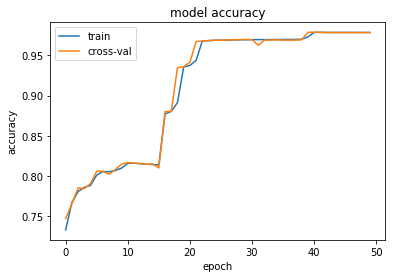

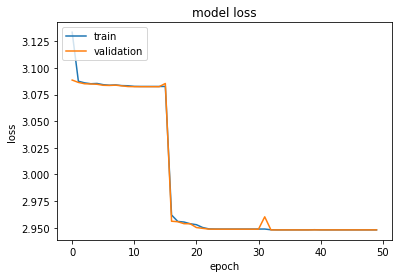

In [73]:
#our Neural Network Model is done training

#list all data in history
print(history.history.keys())

#let's see some stats from our neural network training

#accuracy history
plt.plot(history.history['acc'])
#add in some test/val data that is generated and analyzed separately
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cross-val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
#Lets see how it does against some new Test Data we generate
x_test = np.random.randint(1, highest_integer, size=(10000,2))
y_test = np.zeros((x_test.shape[0],highest_integer))

#one hot encode the correct answer in the test set y data
for i in range(0, x_test.shape[0]):
    y_test[i][gcf(x_test[i][0],x_test[i][1])] = 1
    
#define the shape of the one hot encoded inputs for the test data
x_oh_test = np.zeros((x_test.shape[0],2,highest_integer))

#one hot encode the correct answer
for i in range(0, x_test.shape[0]):
    x_oh_test[i][0][x_test[i,0]] = 1
    x_oh_test[i][1][x_test[i,1]] = 1

#it's always good to make sure the shape of our tensors make sense to us
print(x_oh_test.shape)

#make some predictions on our test data inputs
predictions = model.predict(x_oh_test)

#unpack metrics
loss, mae, acc = model.evaluate(x_oh_test, y_test)

#print metrics
print("Test set accuracy = ", acc)
print("Test set Avg Cross Entropy Error = ", loss)


(10000, 2, 50)
10000/10000 [==============================] - 1s 117us/step
Test set accuracy =  0.9795
Test set Avg Cross Entropy Error =  2.947694892883301


In [70]:
#reproduce the cost calculated by Keras above
Y = y_test[:]
A = predictions[:]
m = predictions.shape[0] 
cost = -(1.0/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) #non-categorical cross entropy 
cost2 = -(1.0/m) * np.sum(Y*np.log(A))
#print(cost)
print("The Categorical Cross Entropy: ", cost2)

The Categorical Cross Entropy:  2.948572765183449


In [81]:
#let's look at the first ten test set inputs, the predictions, and the correct answers
#a neural network prediction is a distribution of likelihoods across all potential answers
#hopefully it places the highest likelihood on the correct answer
print(x_test[:10,:], predictions[:10], y_test[:10])

[[40 10]
 [ 2 19]
 [37 32]
 [42 35]
 [16 32]
 [42  6]
 [46 16]
 [36 44]
 [41 11]
 [29 17]] [[0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933552
  0.01933551 0.01933551 0.01933551 0.01933551 0.05255937 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933552 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551]
 [0.01933551 0.05255937 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551
  0.01933551 0.01933551 0.01933551 0.01933551 0.01933551 0.01933551


In [82]:
#shows what kind of test set examples were missed
#print input, highest prediction, and what likelihood it gave to that wrong answer

for i in range(0, predictions.shape[0]):
    if np.argmax(predictions[i]) != np.argmax(y_test[i]):
        print(x_test[i,:], np.argmax(predictions[i]), predictions[i, np.argmax(predictions[i])])

[25 25] 5 0.05086929
[18 36] 6 0.05086929
[38 38] 2 0.050869286
[11 44] 1 0.05086929
[22 44] 2 0.050869294
[26 13] 1 0.050869286
[43 43] 1 0.05086926
[22 11] 1 0.05086929
[26 39] 1 0.05086929
[47 47] 1 0.05086928
[22 11] 1 0.05086929
[31 31] 1 0.05086929
[34 17] 1 0.05086929
[22 22] 2 0.05086929
[23 23] 1 0.050869294
[46 46] 2 0.05086929
[39 26] 1 0.05086929
[22 44] 2 0.050869294
[29 29] 1 0.05086928
[44 11] 1 0.05086929
[29 29] 1 0.05086928
[13 39] 1 0.05086929
[44 22] 2 0.05086929
[46 46] 2 0.05086929
[38 38] 2 0.050869286
[22 22] 2 0.05086929
[11 22] 1 0.05086929
[25 25] 5 0.05086929
[39 26] 1 0.05086929
[19 38] 1 0.05086929
[44 11] 1 0.05086929
[22 44] 2 0.050869294
[44 11] 1 0.05086929
[36 18] 6 0.05086929
[47 47] 1 0.05086928
[43 43] 1 0.05086926
[23 23] 1 0.050869294
[44 22] 2 0.05086929
[46 46] 2 0.05086929
[11 22] 1 0.05086929
[44 22] 2 0.05086929
[46 46] 2 0.05086929
[23 23] 1 0.050869294
[33 11] 1 0.05086929
[46 23] 1 0.05086928
[37 37] 1 0.050869245
[47 47] 1 0.05086928
[37

In [85]:
#estimate through 500,000 simulations the likelihood that the GCF of a random input pair will be 1, 2, 3, etc.
#if the correct answer is 1 ~60% of the time, hopefully our neural network accuracy will be at least this accurate 

gcf_input = np.random.randint(1, highest_integer, size=(500000,2))

list_of_gcfs = []

for i in range(1, gcf_input.shape[0]):
    list_of_gcfs.append(gcf(gcf_input[i][0],gcf_input[i][1]))

for i in range(1,highest_integer):
    print(list_of_gcfs.count(i)/500000)

0.627336
0.149846
0.06629
0.037752
0.02325
0.017852
0.014632
0.009484
0.007764
0.004598
0.00462
0.00455
0.002904
0.002748
0.002914
0.00294
0.001274
0.001246
0.001266
0.001258
0.001206
0.001246
0.001322
0.001272
0.00045
0.000406
0.000414
0.000432
0.000402
0.0004
0.000456
0.00044
0.000404
0.000392
0.00043
0.000396
0.000412
0.00043
0.000452
0.000402
0.000402
0.000422
0.000436
0.000416
0.000432
0.000424
0.000422
0.000418
0.000338


In [86]:
#get the exact likelihood answers and compare it to our estimated values above

list_of_gcfs = []

for i in range(1, highest_integer):
    for j in range(1,highest_integer):
        list_of_gcfs.append(gcf(i,j))
        
#how many different combinations are possible
print(len(list_of_gcfs))
print((highest_integer-1)*(highest_integer-1))

#print the exact likelihoods of getting a pair of integers less than 100 whose GCF is 1, 2, 3, etc.
for i in range(1,highest_integer):
    print(list_of_gcfs.count(i)/len(list_of_gcfs))

2401
2401
0.6276551436901291
0.1495210329029571
0.06622240733027905
0.037900874635568516
0.022907122032486463
0.01790920449812578
0.014577259475218658
0.009579341940857976
0.007913369429404415
0.004581424406497293
0.004581424406497293
0.004581424406497293
0.0029154518950437317
0.0029154518950437317
0.0029154518950437317
0.0029154518950437317
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.0012494793835901709
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.00041649312786339027
0.000416493127863390